<a href="https://colab.research.google.com/github/Thomas-George-T/Prediciting-Hits-on-Spotify/blob/main/Predicting_Hits_on_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [2]:
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving dataset-of-00s.csv to dataset-of-00s.csv
Saving dataset-of-10s.csv to dataset-of-10s.csv
Saving dataset-of-60s.csv to dataset-of-60s.csv
Saving dataset-of-70s.csv to dataset-of-70s.csv
Saving dataset-of-80s.csv to dataset-of-80s.csv
Saving dataset-of-90s.csv to dataset-of-90s.csv


In [3]:
df_00 = pd.read_csv("dataset-of-00s.csv") 
df_10 = pd.read_csv("dataset-of-10s.csv")
df_60 = pd.read_csv("dataset-of-60s.csv")
df_70 = pd.read_csv("dataset-of-70s.csv")
df_80 = pd.read_csv("dataset-of-80s.csv")
df_90 = pd.read_csv("dataset-of-90s.csv")
df = pd.concat([df_00, df_10, df_60, df_70, df_80, df_90])
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Preprocessing

Finding the number of rows and columns

In [ ]:
df.shape

(41106, 19)

Exploring data types and checking for nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 5519
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

Checking for nulls again. Making doubly sure

In [ ]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

We can see that there are no null values in the dataset. Taking the rough statistics of the data.

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [ ]:
df['time_signature'].describe()

count    41106.000000
mean         3.893689
std          0.423073
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

In [ ]:
df = df.drop(axis=1, labels='time_signature')

Dropping the column time signature as most values are 4.


In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_X = df.iloc[:,3:17]


df_scaled = scale.fit_transform(df_X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_X.columns
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.215416,-0.429668,-0.343315,0.555679,0.665030,-0.511673,0.011220,-0.508740,-0.245926,-0.039055,0.471597,-0.320853,-0.485415,0.518152
1,0.924004,1.086412,1.354030,0.893245,-1.503691,1.277886,-1.020031,-0.508740,-0.309525,0.544503,-0.905554,0.064804,0.073928,-0.097638
2,-2.124046,1.015160,1.071139,1.357892,0.665030,-0.297994,-1.074290,-0.493684,-0.159199,-0.906910,-1.112575,0.874330,1.327148,0.518152
3,-1.977830,1.640592,-0.343315,1.219326,0.665030,1.080465,-1.074596,-0.250443,-0.055127,-0.783465,1.000112,0.174751,0.972847,-0.302901
4,0.507849,0.730153,-0.909096,1.104859,0.665030,-0.527931,-0.003533,-0.508740,-0.442506,0.331280,-0.248819,-0.345625,-0.919860,-0.097638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,-0.808099,0.852864,1.071139,0.781602,-1.503691,1.870147,-1.071880,-0.508052,-0.112945,0.821319,1.154862,-1.284154,-0.513802,-0.918691
41102,0.457236,0.298684,1.071139,0.741877,-1.503691,-0.488447,-0.925315,-0.488116,-0.623476,0.551984,0.509605,-0.195220,-0.274186,-0.097638
41103,0.125437,-1.051141,1.354030,-0.939738,-1.503691,-0.501221,0.223667,-0.508704,-0.552360,0.106835,1.632688,-0.378684,-0.999112,-0.097638
41104,0.462860,0.797446,0.505358,0.779719,0.665030,-0.419930,-1.074320,1.978688,1.049193,-1.228615,0.024494,0.800023,0.369873,0.107625


Managing outliers and creating boxplots to analyze the distribution of data and remove outliers

Text(0.5, 1.0, 'Distribution of predictors with outliers')

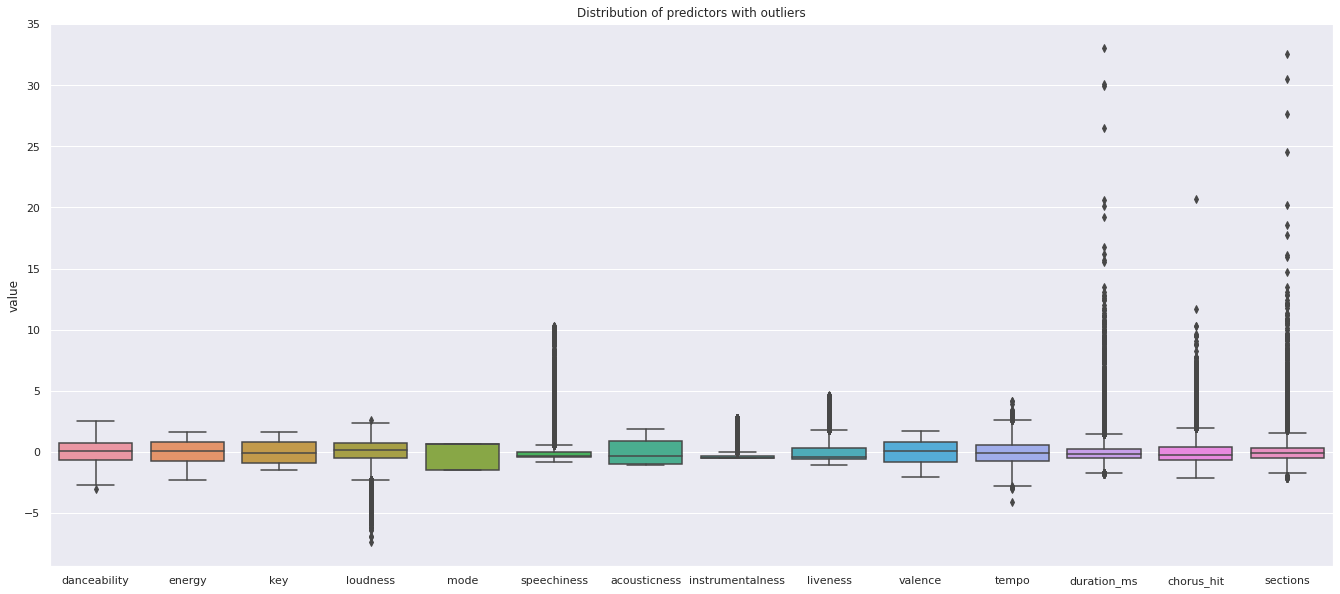

In [ ]:
#box plot with outliers
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

Text(0.5, 1.0, 'Distribution of predictors without outliers')

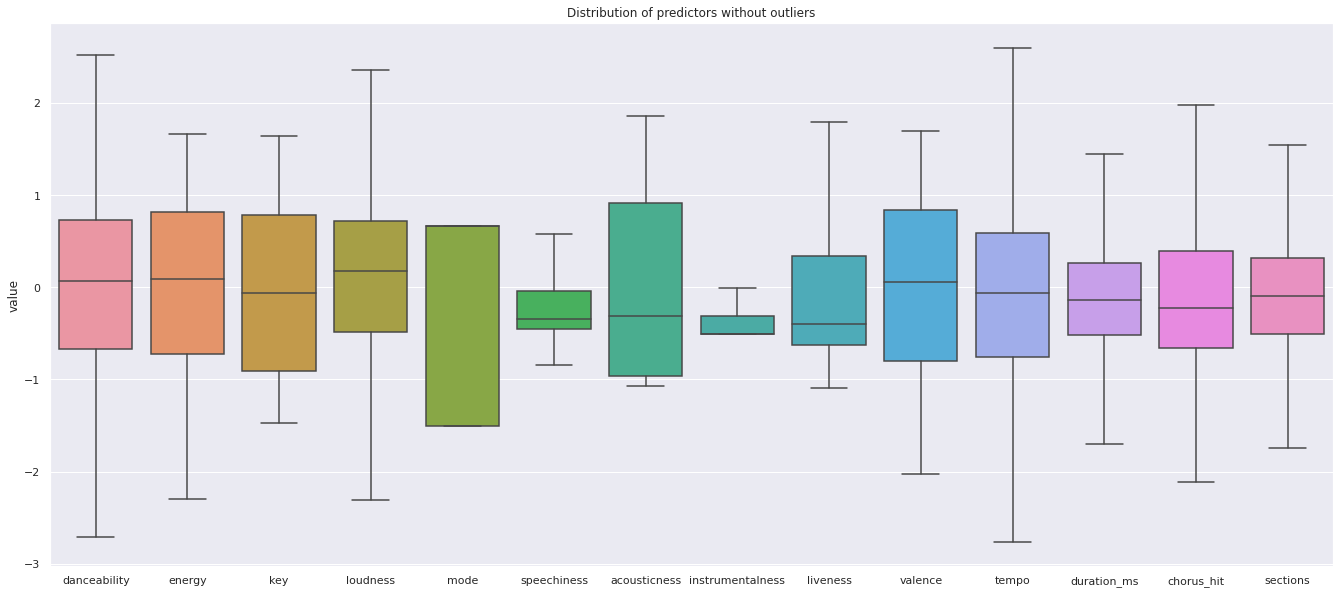

In [ ]:
#boxplot without outliers
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Removing the outliers

In [ ]:
df_clean= df_scaled
for col in df_clean.columns:
  q1=df_clean[col].quantile(0.25)
  q3=df_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(df_clean[col] >= q1-1.5*inq) & (df_clean[col] <= q3+1.5*inq)
  df_clean[col] = df_clean[col].loc[filter]

In [ ]:
#number of outliers for each predictor
df_clean.isna().sum()

danceability           1
energy                 0
key                    0
loudness            1343
mode                   0
speechiness         5088
acousticness           0
instrumentalness    8920
liveness            2688
valence                0
tempo                434
duration_ms         1987
chorus_hit          1839
sections            1570
dtype: int64

Removing 2 predictors with a lot of outliers

In [ ]:
#removing 2 predictors
df_clean = df_clean.drop(axis=1, labels=['speechiness', 'instrumentalness'])

In [ ]:
df_remove = df_clean.dropna()
df_remove.shape

(33401, 12)

Total of 33401 songs remain after cleaning

Text(0.5, 1.0, 'Distribution of predictors without outliers')

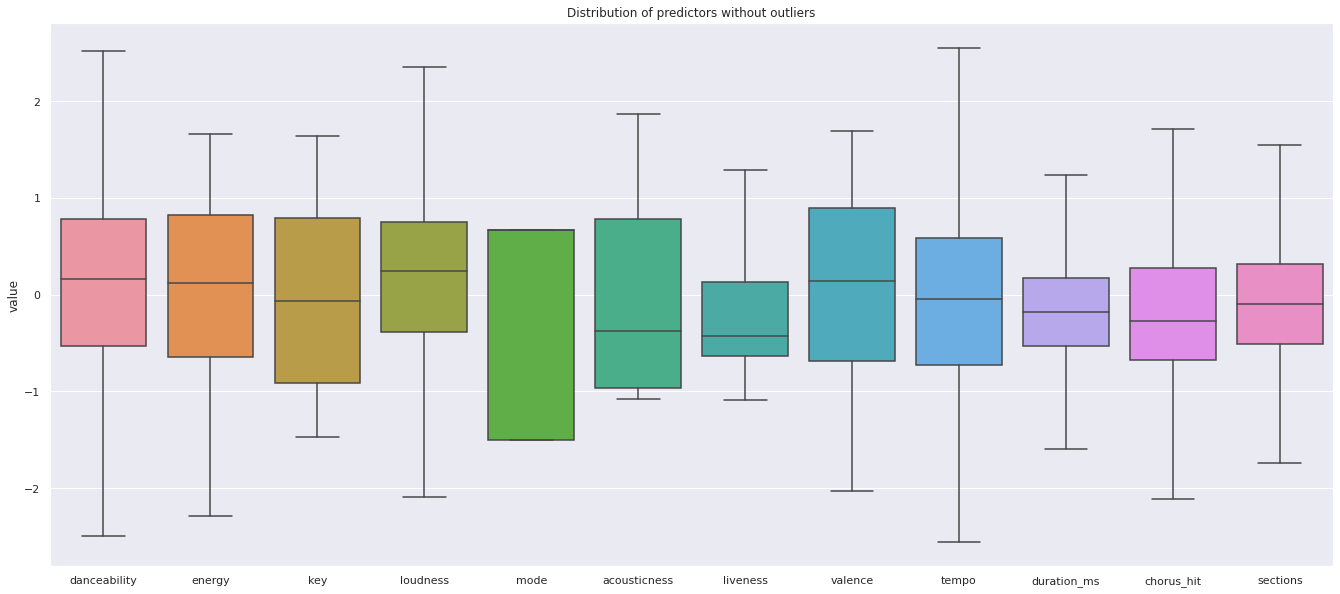

In [ ]:
#box plot after removing the outliers
df_melt=pd.melt(df_remove)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Creating the unscaled dataframe without the outliers

In [ ]:
df_merge = df.iloc[df_remove.index]

In [ ]:
df_merge = df_merge.drop(axis=1, labels=['speechiness', 'instrumentalness'])

In [ ]:
df_merge.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

Counting the number of observations in each class

In [ ]:
#observations in each class
df_merge.groupby('target')[['danceability', 'energy', 'key', 'loudness',
       'mode', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections']].count()

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
target,,,,,,,,,,,,
0,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247,15247
1,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154,18154


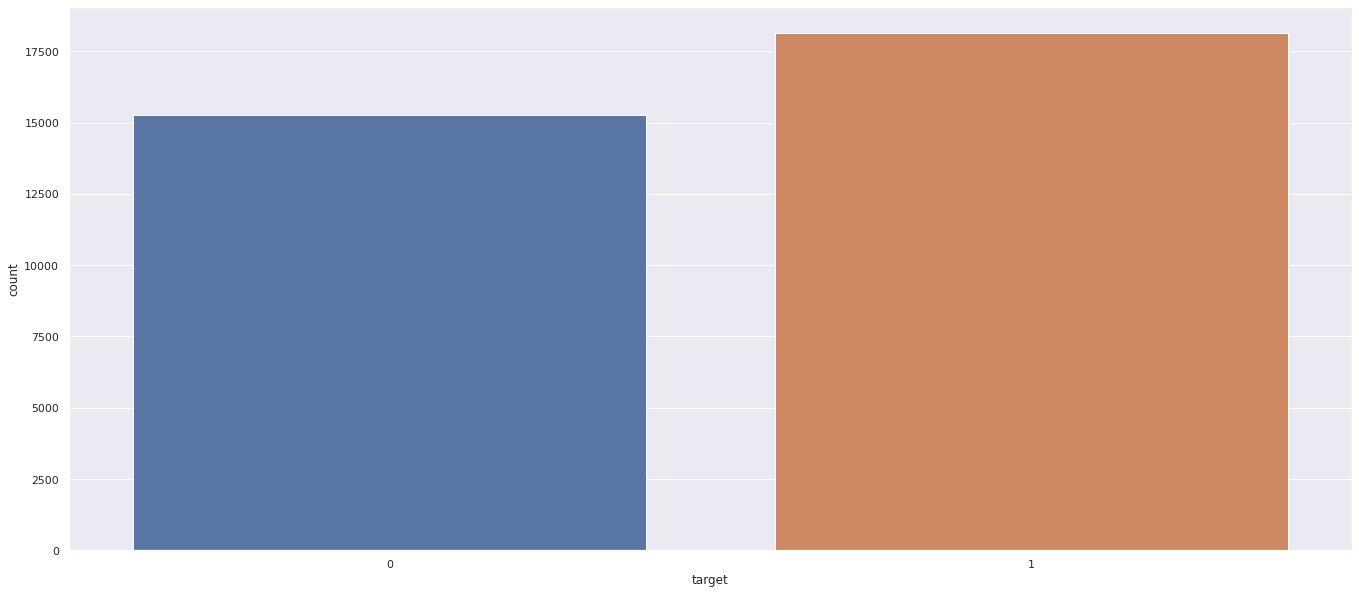

In [ ]:
#plotting the number of observations
sns.countplot(x='target', data=df_merge)
sns.set(rc={'figure.figsize':(12,8)})

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

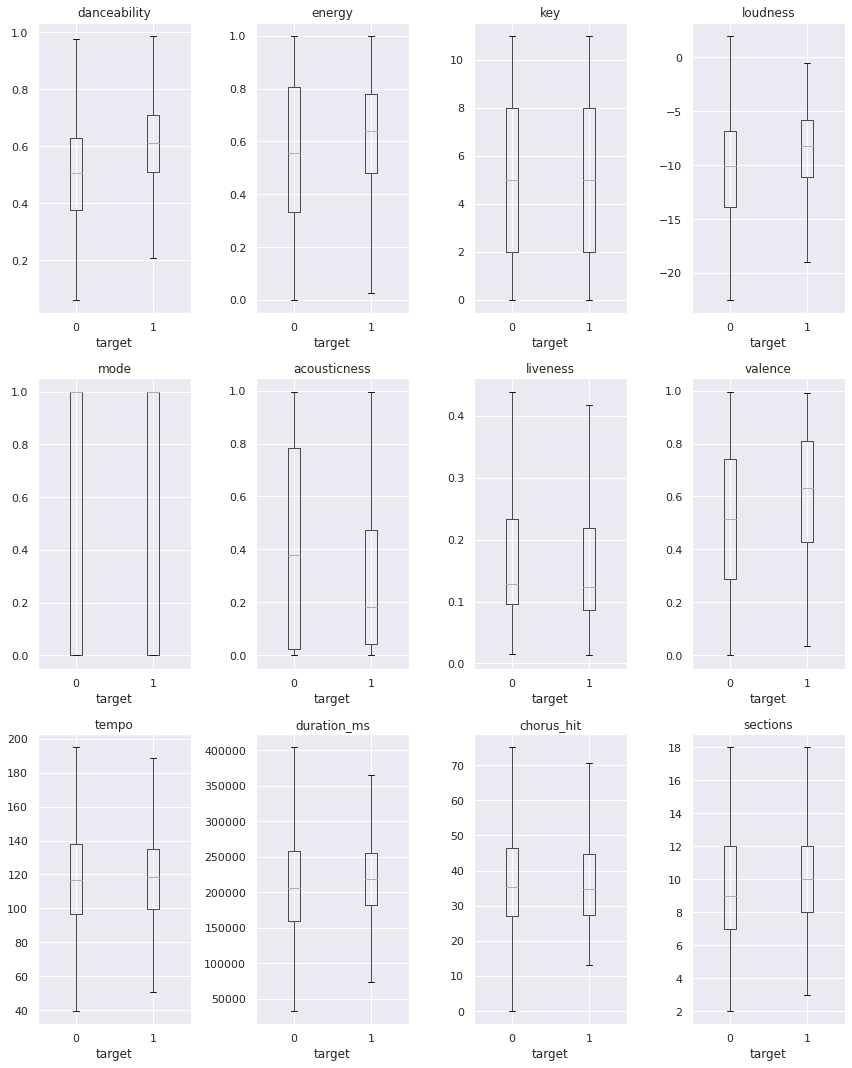

In [ ]:
#plotting box plots based on target variable for different predictors
plt.rcParams["figure.figsize"] = [12, 15]
fig, axes = plt.subplots(nrows=3, ncols=4, )
df_merge.boxplot(column= 'danceability', by='target', ax=axes[0][0], showfliers=False)
df_merge.boxplot(column= 'energy', by='target', ax=axes[0][1], showfliers=False)
df_merge.boxplot(column='key', by='target', ax=axes[0][2], showfliers=False)
df_merge.boxplot(column='loudness', by='target', ax=axes[0][3], showfliers=False)
df_merge.boxplot(column='mode', by='target', ax=axes[1][0], showfliers=False)
df_merge.boxplot(column='acousticness', by='target', ax=axes[1][1], showfliers=False)
df_merge.boxplot(column='liveness', by='target', ax=axes[1][2], showfliers=False)
df_merge.boxplot(column='valence', by='target', ax=axes[1][3], showfliers=False)
df_merge.boxplot(column='tempo', by='target', ax=axes[2][0], showfliers=False)
df_merge.boxplot(column='duration_ms', by='target', ax=axes[2][1], showfliers=False)
df_merge.boxplot(column='chorus_hit', by='target', ax=axes[2][2], showfliers=False)
df_merge.boxplot(column='sections', by='target', ax=axes[2][3], showfliers=False)
plt.tight_layout()
plt.suptitle(None)
plt.show()

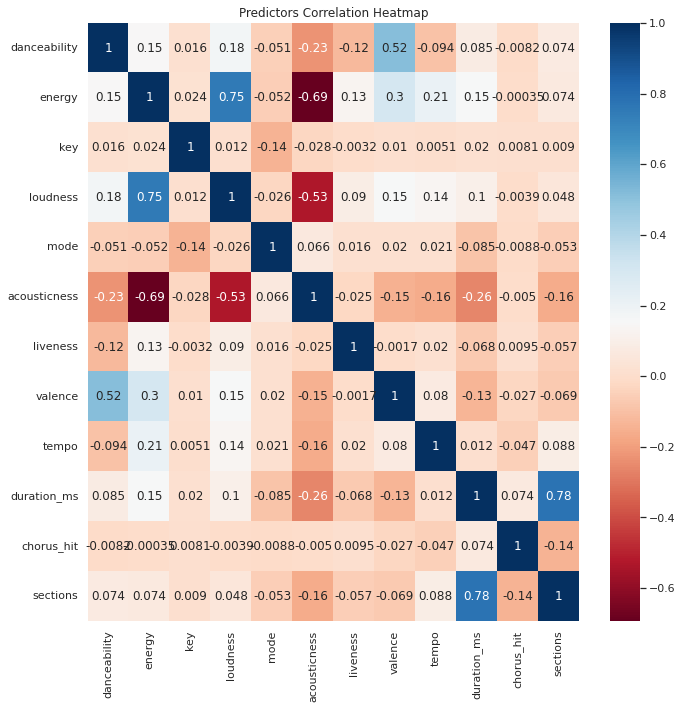

In [ ]:
#correlation between the predictors
fig, ax = plt.subplots(figsize=(11,11)) 
ax = sns.heatmap(df_remove.corr(), annot=True, cmap='RdBu').set(title='Predictors Correlation Heatmap')

In [ ]:
df_merge.iloc[:,3:15]

,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.578,0.471,4,-7.270,1,0.368000,0.1590,0.532,133.061,196707,30.88059,13
1,0.704,0.854,10,-5.477,0,0.018500,0.1480,0.688,92.988,242587,41.51106,10
2,0.162,0.836,9,-3.009,1,0.000111,0.1740,0.300,86.964,338893,65.32887,13
3,0.188,0.994,4,-3.745,1,0.000007,0.1920,0.333,148.440,255667,58.59528,9
4,0.630,0.764,2,-4.353,1,0.363000,0.1250,0.631,112.098,193760,22.62384,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5515,0.396,0.795,9,-6.070,0,0.000928,0.1820,0.762,152.943,82107,30.34109,6
5516,0.621,0.655,9,-6.281,0,0.050600,0.0937,0.690,134.167,211653,34.89506,10
5517,0.562,0.314,10,-15.213,0,0.440000,0.1060,0.571,166.847,189827,21.11763,10
5518,0.622,0.781,7,-6.080,1,0.000101,0.3830,0.214,120.051,330053,47.13558,11


In [ ]:
#creating final scaled data with all the variables
scale = StandardScaler()
scale_X = scale.fit_transform(df_merge.iloc[:,3:15])
df_merge.iloc[:,3:15] = scale_X

In [ ]:
df_merge

,track,artist,uri,danceability,energy,key,loudness,mode,acousticness,liveness,valence,tempo,duration_ms,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.118486,-0.518795,-0.339478,0.535085,0.651748,0.072572,-0.076165,-0.126019,0.495782,-0.315094,-0.479443,1.088622,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.861614,1.100931,1.356353,0.957657,-1.534336,-0.997974,-0.181124,0.478866,-0.953376,0.405103,0.308361,0.031727,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,-2.335015,1.024808,1.073715,1.539313,0.651748,-1.054301,0.066960,-1.025591,-1.171222,1.916857,2.073455,1.088622,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,-2.181672,1.692998,-0.339478,1.365853,0.651748,-1.054618,0.238710,-0.897635,1.051932,0.610425,1.574441,-0.320571,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.425174,0.720316,-0.904754,1.222560,0.651748,0.057257,-0.400582,0.257851,-0.262302,-0.361354,-1.091335,0.031727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,(You're A) Go Nowhere,Reagan Youth,spotify:track:4e86fqSFhqRQk3Z9hm7XHt,-0.954921,0.851417,1.073715,0.817900,-1.534336,-1.051798,0.143293,0.765799,1.214773,-2.114016,-0.519424,-1.377467,0
5516,La Fiebre de Norma,La Castañeda,spotify:track:43DFcnOZprnVlAFKwgBJ3e,0.372093,0.259350,1.073715,0.768171,-1.534336,-0.899649,-0.699237,0.486621,0.535778,-0.080480,-0.181938,0.031727,0
5517,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.024120,-1.182755,1.356353,-1.336912,-1.534336,0.293114,-0.581874,0.025203,1.717583,-0.423092,-1.202957,0.031727,1
5518,Inane,KMFDM,spotify:track:2Ao3Wi4raEOQfKQiU9EU8y,0.377991,0.792210,0.508438,0.815543,0.651748,-1.054332,2.061170,-1.359053,0.025302,1.778092,0.725184,0.384025,0


# Building the Model

Creating X and Y

In [ ]:
X = df_merge.iloc[:,3:15]
X.shape

(33401, 12)

In [ ]:
y = df_merge['target']
y.shape

(33401,)

**Step 1 for choosing the top models**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

# First Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
#training the models
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [ ]:
#3 fold cross validation for choosing the top models
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

mean_df = []
for name, model in models.items():
  mean_arr = {}
  cv_results = cross_val_score(model, X_train, y_train, cv=3)
  print(name, cv_results)
  mean = np.mean(cv_results)
  mean_arr['name']=name
  mean_arr['result']=mean
  mean_df.append(mean_arr)
  
    

                   Logistic Regression [0.68092512 0.68260918 0.68100157]
                   K-Nearest Neighbors [0.68126193 0.6813742  0.68942286]
                         Decision Tree [0.64937689 0.64960144 0.64596901]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Support Vector Machine (Linear Kernel) [0.68193556 0.68272146 0.68212441]
   Support Vector Machine (RBF Kernel) [0.73234535 0.73492759 0.73545924]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


                        Neural Network [0.73268216 0.73279443 0.72838536]
                         Random Forest [0.73762209 0.73896935 0.73253986]
                     Gradient Boosting [0.73402942 0.73021219 0.72860993]


In [ ]:
pd.DataFrame(mean_df)

,name,result
0,Logistic Regression,0.681512
1,K-Nearest Neighbors,0.684020
2,Decision Tree,0.648316
3,Support Vector Machine (Linear Kernel),0.682260
4,Support Vector Machine (RBF Kernel),0.734244
5,Neural Network,0.731287
6,Random Forest,0.736377
7,Gradient Boosting,0.730951


In the first step we choose the top 4 models.



# **5 fold Cross Validation for choosing the best model**

Support Vector Machine

In [ ]:
#Support vector machine
from sklearn.model_selection import cross_val_score

clf = SVC()
cv_results = cross_val_score(clf, X, y, cv=5)
cv_results

array([0.7536297 , 0.71901198, 0.68203593, 0.70778443, 0.73203593])

In [ ]:
np.mean(cv_results)

0.718899591925265

The accuracy of support vector machine model is 0.71

Neural Networks

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf, X, y, cv=5)
cv_results = cross_val_score(clf, X, y, cv=5)
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

array([0.7597665 , 0.71946108, 0.66511976, 0.70194611, 0.74026946])

In [ ]:
np.mean(cv_results)

0.7173125818412569

The accuracy for neural network model is 0.71

**Random Forest**

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rand = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 1, cv = 2)
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [ ]:
#Random Forest

from sklearn.model_selection import cross_val_score
m = RandomForestClassifier()
print(cross_val_score(RandomForestClassifier(),X_train, y_train,cv=5))

[0.74438623 0.72735778 0.7369012  0.74195359 0.7376497 ]


In [ ]:
np.mean(([0.74513473, 0.72922904, 0.74045659, 0.74326347, 0.74195359]))

0.740007484

The accuracy for the random forest model is 0.74

Gradient Boosting

In [ ]:
#gradient boosting

clf = GradientBoostingClassifier()
cv_results = cross_val_score(clf, X, y, cv=5)
cv_results


array([0.75886843, 0.71721557, 0.65643713, 0.7005988 , 0.73173653])

In [ ]:
np.mean(cv_results)

0.7129712913642854

The accuracy for the gradient boosting model is 0.71

We choose Random Forest as our final model.

# **Model Implementation Part 2: Random Forest Model**

In [ ]:
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

**Importance of the variables**

In [ ]:
#feature importance
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('danceability', 0.13),
 ('energy', 0.11),
 ('key', 0.04),
 ('loudness', 0.1),
 ('mode', 0.01),
 ('acousticness', 0.15),
 ('liveness', 0.07),
 ('valence', 0.09),
 ('tempo', 0.07),
 ('duration_ms', 0.11),
 ('chorus_hit', 0.07),
 ('sections', 0.04)]

Text(0.5, 0, 'Feature Importance')

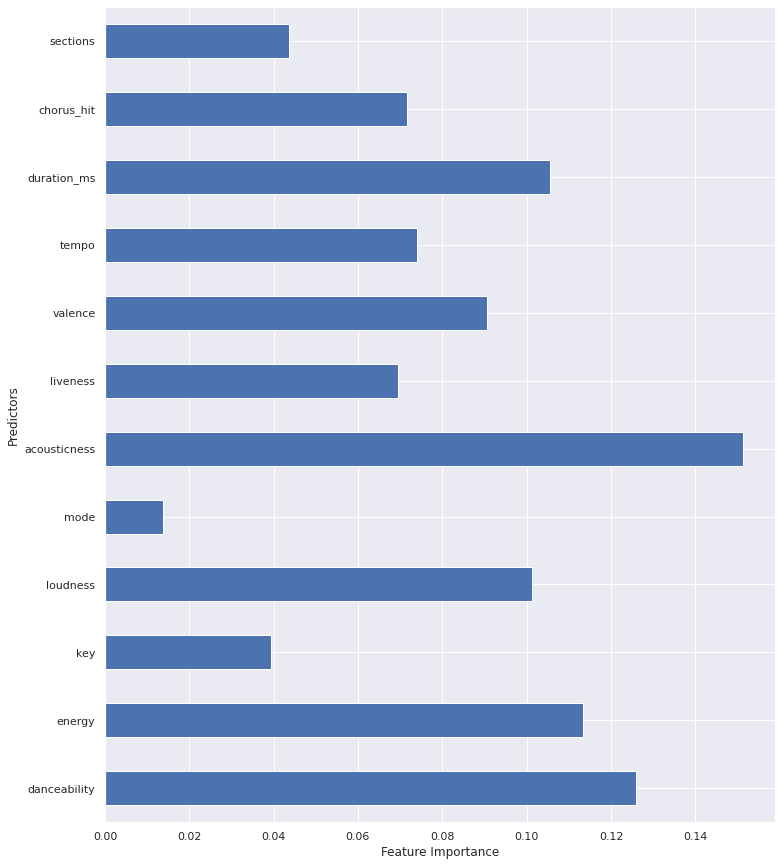

In [ ]:
#plotting feature importance
feat_importances_plot = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_plot.plot(kind='barh')
plt.ylabel("Predictors")
plt.xlabel("Feature Importance")

In [ ]:
#dropping 3 less important predictors
X_reduced = X.drop(labels=['key', 'mode', 'sections'], axis=1)
X_reduced

,danceability,energy,loudness,acousticness,liveness,valence,tempo,duration_ms,chorus_hit
0,0.118486,-0.518795,0.535085,0.072572,-0.076165,-0.126019,0.495782,-0.315094,-0.479443
1,0.861614,1.100931,0.957657,-0.997974,-0.181124,0.478866,-0.953376,0.405103,0.308361
2,-2.335015,1.024808,1.539313,-1.054301,0.066960,-1.025591,-1.171222,1.916857,2.073455
3,-2.181672,1.692998,1.365853,-1.054618,0.238710,-0.897635,1.051932,0.610425,1.574441
4,0.425174,0.720316,1.222560,0.057257,-0.400582,0.257851,-0.262302,-0.361354,-1.091335
...,...,...,...,...,...,...,...,...,...
5515,-0.954921,0.851417,0.817900,-1.051798,0.143293,0.765799,1.214773,-2.114016,-0.519424
5516,0.372093,0.259350,0.768171,-0.899649,-0.699237,0.486621,0.535778,-0.080480,-0.181938
5517,0.024120,-1.182755,-1.336912,0.293114,-0.581874,0.025203,1.717583,-0.423092,-1.202957
5518,0.377991,0.792210,0.815543,-1.054332,2.061170,-1.359053,0.025302,1.778092,0.725184


In [ ]:
X_red_train, X_red_test, y_red_train , y_red_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

In [ ]:
cross_val_score(RandomForestClassifier(),X_red_train, y_red_train,cv=5)

array([0.73409431, 0.72735778, 0.73671407, 0.73353293, 0.73484281])

In [ ]:
np.mean([0.73409431, 0.72735778, 0.73671407, 0.73353293, 0.73484281])

0.73330838

The accuracy is decreased by 0.006 and the running time is reduced by 1 second, therefore we will not use this trade off in our model and we will continue to use all the features.

**PCA**

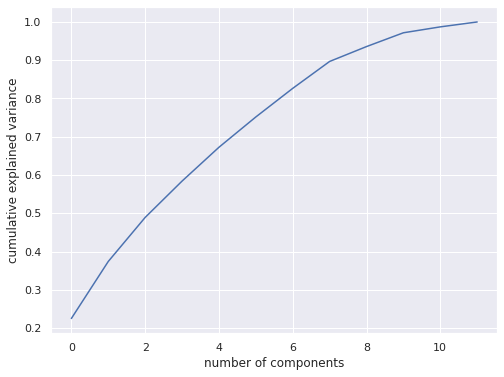

None

In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=12)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

We Can use 7 principle components to capture 90% of the total variance.

In [ ]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
cross_val_score(RandomForestClassifier(),X_train_pca, y_train,cv=5)

array([0.68712575, 0.68731287, 0.67477545, 0.68787425, 0.6925524 ])

In [ ]:
np.mean([0.68712575, 0.68731287, 0.67477545, 0.68787425, 0.6925524 ])

0.6859281439999999

It can be seen that the performance of the model is not enhanced with dimension reduction.

Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees in the model
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

#maximum number of splits for each tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]

#minimum number of cases required before spliting
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

#minimum number required in each leaf at the end
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

               

In [ ]:
rf_rs = RandomizedSearchCV(rf, 
                        param_dist, 
                        n_iter = 40, 
                        cv = 3, 
                        n_jobs=-1, 
                        random_state=1)
rf_rs.fit(X_train, y_train)
rf_rs.best_params_


{'bootstrap': False,
 'max_depth': 13,
 'min_samples_leaf': 12,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
random_df = pd.DataFrame(rf_rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
random_df = random_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

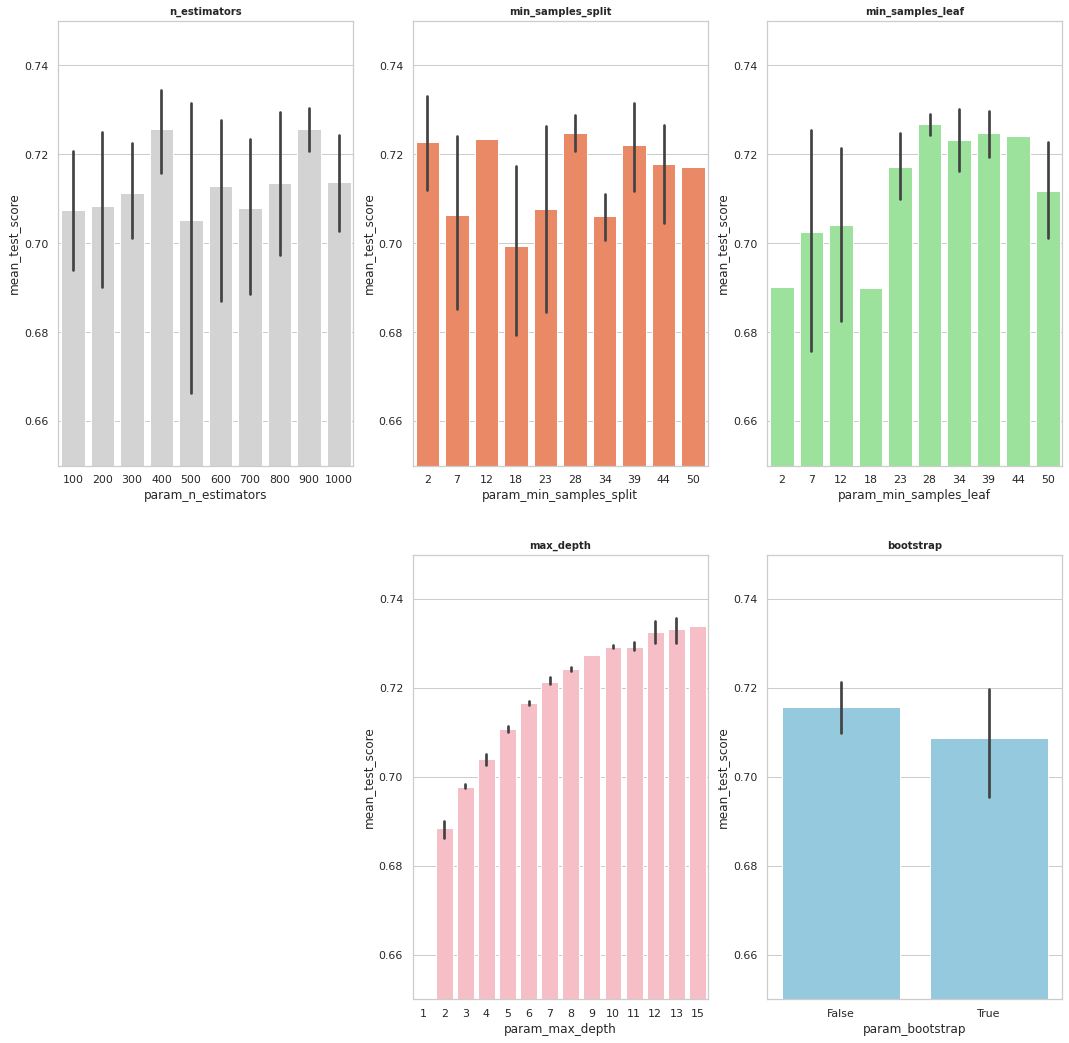

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig.set_size_inches(18,18)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=random_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.65,.75])
axs[0,0].set_title(label = 'n_estimators', size=10, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=random_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.65,.75])
axs[0,1].set_title(label = 'min_samples_split', size=10, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=random_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.65,.75])
axs[0,2].set_title(label = 'min_samples_leaf', size=10, weight='bold')


sns.barplot(x='param_max_depth', y='mean_test_score', data=random_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.65,.75])
axs[1,1].set_title(label = 'max_depth', size=10, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=random_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.65,.75])
axs[1,2].set_title(label = 'bootstrap', size=10, weight='bold')

axs[1,0].set_axis_off()
plt.show()

From the results for the number of estimators we choose [400,900].
For min sample split we choose [2,12,28].
For min sample leaf we choose [28,34].
For max depth we choose [12,13].
And we choose bootstrap False.

In [ ]:
grid = {'bootstrap': [False],
 'max_depth': [12,13],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [28, 34],
 'min_samples_split': [2, 12, 28],
 'n_estimators': [ 400, 900]}

In [ ]:
gs = GridSearchCV(rf, grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'bootstrap': False,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 28,
 'min_samples_split': 12,
 'n_estimators': 400}

In [ ]:
y_pred_gs = gs.best_estimator_.predict(X_test)
accuracy_score(y_test,y_pred_gs)

0.7307289327944918

In [ ]:
sum(y_test == 1)

3606

# Performance Evaluation and Interpretation

Importing Accuracy score, confusion matrix and Classification report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Calculating accuracy scores

In [ ]:
accuracy_score(y_test, y_pred)

0.7353689567430025

View Confusion Matrix for test data and the predictions

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[2935,  671],
       [1097, 1978]])

Printing the classification report for test data and the predictions

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3075
           1       0.73      0.81      0.77      3606

    accuracy                           0.74      6681
   macro avg       0.74      0.73      0.73      6681
weighted avg       0.74      0.74      0.73      6681



In [ ]:
y_prob= rf.predict_proba((X_test))

In [ ]:
prob_1 = y_prob[::,1]

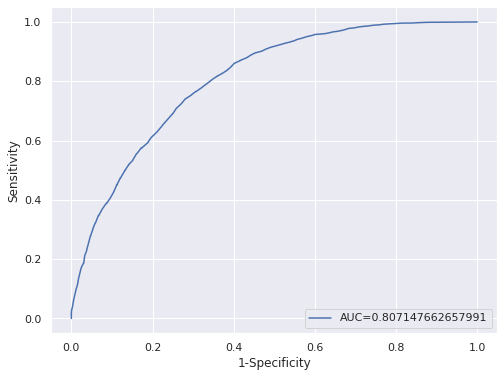

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prob_1)
auc = metrics.roc_auc_score(y_test, prob_1)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.legend(loc=4)
plt.show()
